In [1]:
import matplotlib
matplotlib.use('Agg')

import sys
sys.path.append('/home2/datahome/tpicard/python/Python_Modules_RREX2008/')

######################
#import useful modules
######################

from Modules import *
from Modules_gula import *
from matplotlib.offsetbox import AnchoredText
import cartopy.crs as ccrs
import cartopy
from datetime import date, timedelta, datetime
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import scipy.stats as stats

import datetime
nb_dpi = 50
dir_save = '/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/figures/'

str_month = 'apr'
simu_name = 'rrex2008_avg_3h_{0}'.format(str_month)
time = 3*8 - 4
simul = load(simul = simu_name+ ' [0,810,0,1010,[1,200,1]] ' + format(time), light=False, output=True)
depth = 0
#tpas = var('tpas01',simul,depths=[depth]).data
#tpas = var('tpas01',simul).data

#mld_kpp = var('hbl',simul).data
#mld_t = var('hbls_t',simul).data

mld_d = var('hbls_rho',simul).data

u = var('u',simul,depths=[depth]).data
v = var('v',simul,depths=[depth]).data

w = var('w',simul).data
strain =  tools.get_strain(u,v,simul.pm,simul.pn) / simul.f
vrt =  tools.psi2rho(tools.get_vrt(u,v,simul.pm,simul.pn) / tools.rho2psi(simul.f))
u = var('u',simul).data
v = var('v',simul).data
z_r,z_w = tools.get_depths(simul)
tpas = var('tpas01',simul).data
rho = var('rho',simul).data

coord = 'points'
if coord=='deg':
    #using lon,lat
    lon = simul.x; lat = simul.y
    xlabel = 'lon'; ylabel = 'lat'
    
elif coord=='km':
    # using km
    [lon,lat] = np.meshgrid(np.arange(simul.x.shape[0])+simul.coord[2],np.arange(simul.x.shape[1])+simul.coord[0])
    lon = (lon/np.mean(simul.pm)*1e-3).T
    lat = (lat/np.mean(simul.pn)*1e-3).T
    xlabel = 'km'; ylabel = 'km'
elif coord=='points':
    # using grid points
    [lon,lat] = np.meshgrid(np.arange(simul.x.shape[0])+simul.coord[2],np.arange(simul.x.shape[1])+simul.coord[0])
    lon,lat = lon.T,lat.T
    xlabel = 'grid pts'; ylabel = 'grid pts'
    
    


simulname is None
args (['rrex2008_avg_3h_apr', '[0,810,0,1010,[1,200,1]]', '20'],)
args[0] ['rrex2008_avg_3h_apr', '[0,810,0,1010,[1,200,1]]', '20']
len(args[0]) 3
/home/datawork-lops-rrex/tpicard/OUTPUTS_RREX2008_Full_tracer
/home/datawork-lops-rrex/tpicard/OUTPUTS_RREX2008_Full_tracer
time of simulation is: 20
coord
loading /home/datawork-lops-rrex/tpicard/OUTPUTS_RREXNUM200/HIS/@expname@_@freq@_grid.nc
loading /home/datawork-lops-rrex/tpicard/Config_RREX2008_MASTER_PAR_FILES/AVG/rrex2008_avg_3h_apr.nc
get domain [0,810,0,1010,[1,200,1]] [0,81
coordmax
loading /home/datawork-lops-rrex/tpicard/OUTPUTS_RREXNUM200/HIS/@expname@_@freq@_grid.nc
loading /home/datawork-lops-rrex/tpicard/Config_RREX2008_MASTER_PAR_FILES/AVG/rrex2008_avg_3h_apr.nc
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
cst
read Cs_r in ncfile.variables
dt
dt is read in  /home/datawork-lops-rrex/tpicard/Config_RREX2008_MASTER_PAR_FILES/AVG/rrex2008_avg_3h_apr.nc
[0, 802, 0, 1002, array([  1,   2,   3,   4,   5,   6,   7,   

In [2]:

[lon_km,lat_km] = np.meshgrid(np.arange(simul.x.shape[0])+simul.coord[2],np.arange(simul.x.shape[1])+simul.coord[0])
lon_km = (lon/np.mean(simul.pm)*1e-3).T
lat_km = (lat/np.mean(simul.pn)*1e-3).T
xlabel = 'km'; ylabel = 'km'

<ipython-input-3-4a7e5e5f1c7d>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cm = plt.pcolormesh(lon[lon_min:lon_max,lat_min:lat_max],lat[lon_min:lon_max,lat_min:lat_max],vrt[lon_min:lon_max,lat_min:lat_max],cmap = plt.cm.RdBu_r,vmax=1,vmin=-1)
<ipython-input-3-4a7e5e5f1c7d>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = plt.pcolormesh(lon_size,z_r[501,y_f_i,:],np.transpose(w[lon_min:lon_max,y_f_i,:]*3600*24,(1,0)),vmax=200,vmin=-200,cmap = plt.c

Text(0, 0.5, 'Depth [m]')

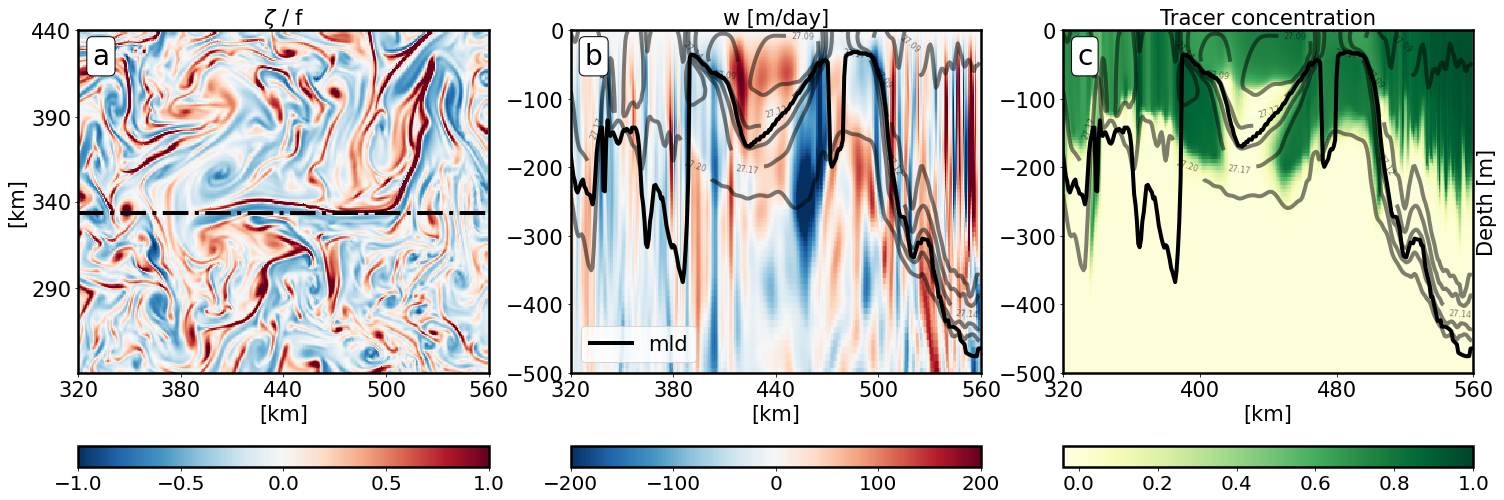

In [3]:
%matplotlib inline
from matplotlib import rc, rcParams
import matplotlib.gridspec as gridspec
import matplotlib.transforms as mtransforms

rc('axes', linewidth=2)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
props = dict(boxstyle='round', facecolor='white', alpha=1)

size_tick = 21
size_label=21


delta = 202
y_f_i = 417#411
y_f = lat[0,y_f_i]


lon_min = 400
lon_max = 700
lon_size = lon[lon_min:lon_max,y_f_i]

lat_min = 300
lat_max = 550

levels = [27.09,27.1,27.2,27.3]
levels = np.linspace(27.09,27.2,5)


fig = plt.figure(figsize=(25,9))

#ax = plt.subplot(G[0.5:1.5, 0])

ax = fig.add_subplot(1,3,1)

label = 'a'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax.text(0.01, 0.98, label, transform=ax.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

plt.title(r'$\zeta$ / f', fontsize=size_label)

cm = plt.pcolormesh(lon[lon_min:lon_max,lat_min:lat_max],lat[lon_min:lon_max,lat_min:lat_max],vrt[lon_min:lon_max,lat_min:lat_max],cmap = plt.cm.RdBu_r,vmax=1,vmin=-1)
#plt.contour(lon[:,200:600],lat[:,200:600],rho[:,200:600,-1],cmap = plt.cm.RdBu_r,alpha=1)
cb = plt.colorbar(cm,orientation='horizontal')
#cb.set_label(r'$\zeta$ / f', fontsize=size_label)
cb.ax.tick_params(labelsize=20)


front_left = lon[425,0]
front_right = lon[595,0]


plt.hlines(y_f,lon[lon_min,y_f],lon[lon_max,y_f],color='k',linestyle='-.',alpha=1,linewidth=4)
#plt.scatter(front_right,y_f,s=500, facecolors='none', edgecolors='k',linewidths =2)
#plt.scatter(front_left,y_f,s=500, facecolors='none', edgecolors='k',linewidths =2)
plt.xlim(lon[lon_min,y_f],lon[lon_max,y_f])
plt.ylim(lat_min,lat_max)
plt.ylabel('[km]',fontsize = size_label)
plt.xlabel('[km]',fontsize = size_label)
#plt.xlabel('Longitude [km]',fontsize = 14)
plt.xticks(fontsize=size_tick)
plt.yticks(fontsize=size_tick)
plt.xticks([])
plt.yticks([362,425,487,550],[290,340,390,440])
plt.xticks([400,475,550,625,700],[320,380,440,500,560],fontsize=size_tick)
#ax = fig.add_subplot(4,1,3)

ax = fig.add_subplot(1,3,2)

label = 'b'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax.text(0.01, 0.98, label, transform=ax.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))


pc = plt.pcolormesh(lon_size,z_r[501,y_f_i,:],np.transpose(w[lon_min:lon_max,y_f_i,:]*3600*24,(1,0)),vmax=200,vmin=-200,cmap = plt.cm.RdBu_r)
CS = plt.contour(lon_size,z_r[501,y_f_i,:],np.transpose(rho[lon_min:lon_max,y_f_i,:],(1,0)),levels=levels,colors='k',alpha=0.5,label='Isodensity',linewidths=4)
ax.clabel(CS, inline=True, fontsize=8,fmt='%2.2f')


'''
plt.vlines(front_right+10,-900,0,color='k',linestyle = '--',alpha=1,linewidth=2)
#plt.vlines(595,-900,0,color='k',linestyle = '--',alpha=0.5)
plt.vlines(front_right-10,-900,0,color='k',linestyle = '--',alpha=1,linewidth=2)

plt.vlines(front_left-10,-900,0,color='k',linestyle = '--',alpha=1,linewidth=2)
#plt.vlines(422,-900,0,color='k',linestyle = '--',alpha=0.5)
plt.vlines(front_left+10,-900,0,color='k',linestyle = '--',alpha=1,label='Front zone',linewidth=2)
'''
plt.plot(lon_size,-mld_d[lon_min:lon_max,y_f_i],color='k',label='mld',linewidth=4)
plt.title('w [m/day]', fontsize=size_label)
plt.xticks([])
cb = plt.colorbar(pc,orientation='horizontal')
#cb.set_label('w [m/day]', fontsize=size_label)
cb.ax.tick_params(labelsize=20)
plt.ylim(-500,0)

#plt.ylabel('Depth [m]',fontsize = size_label)
plt.legend(fontsize = size_label,loc=3)
plt.xticks(fontsize=size_tick)
plt.yticks(fontsize=size_tick)
plt.xticks([400,475,550,625,700],[320,380,440,500,560],fontsize=size_tick)
plt.xlabel('[km]',fontsize = size_label)
#ax = fig.add_subplot(4,1,4)


ax = fig.add_subplot(1,3,3)


label = 'c'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax.text(0.01, 0.98, label, transform=ax.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))


CS = plt.contour(lon_size,z_r[501,y_f,:],np.transpose(rho[lon_min:lon_max,y_f,:],(1,0)),levels=levels,colors='k',alpha=0.5,label='Isodensity',linewidths=4)
ax.clabel(CS, inline=True, fontsize=8,fmt='%2.2f')

plt.pcolormesh(lon_size,z_r[501,y_f_i,:],np.transpose(tpas[lon_min:lon_max,y_f_i,:],(1,0)),cmap = plt.cm.YlGn,vmax=1)
plt.plot(lon_size,-mld_d[lon_min:lon_max,y_f_i],color='k',label='mld',linewidth=4)
#plt.plot(lon[201:801,400],-mld_t[201:801,400],color='r',label='mld_t')
#plt.plot(lon[201:801,400],-mld_kpp[201:801,400],color='g',label='mld_kpp')
cb = plt.colorbar(orientation='horizontal')
plt.title('Tracer concentration', fontsize=size_label)
#cb.set_label('Tracer concentration', fontsize=size_label)
cb.ax.tick_params(labelsize=20)
plt.xticks(fontsize=size_tick)
plt.ylim(-500,0)
plt.xlabel('[km]',fontsize = size_label)
plt.xticks([400,475,550,625,700],[320,380,440,500,560],fontsize=size_tick)

plt.xlabel('[km]',fontsize = size_label)
plt.xticks(fontsize=size_tick)
plt.yticks(fontsize=size_tick)
plt.xticks([400,500,600,700],[320,400,480,560])
ax.yaxis.set_label_position("right")
plt.ylabel('Depth [m]',fontsize = size_label)
#plt.legend()

#plt.savefig(dir_save+'cut_front.pdf',dpi=nb_dpi,bbox_inches='tight')


<ipython-input-48-fc4c0fa33b69>:45: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cm = plt.pcolormesh(lon[lon_min:lon_max,lat_min:lat_max],lat[lon_min:lon_max,lat_min:lat_max],vrt[lon_min:lon_max,lat_min:lat_max],cmap = plt.cm.RdBu_r,vmax=1,vmin=-1)
<ipython-input-48-fc4c0fa33b69>:50: UserWarning: The following kwargs were not used by contour: 'label'
  CS = plt.contour(lon[lon_min:lon_max,lat_min:lat_max],lat[lon_min:lon_max,lat_min:lat_max],rho[lon_min:lon_max,lat_min:lat_max,-1],(1,0),levels=levels_surf,colors='k',alpha=0.5,label='Isodensity',linewidths=4)
<ipython-input-48-fc4c0fa33b69>:80: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify 

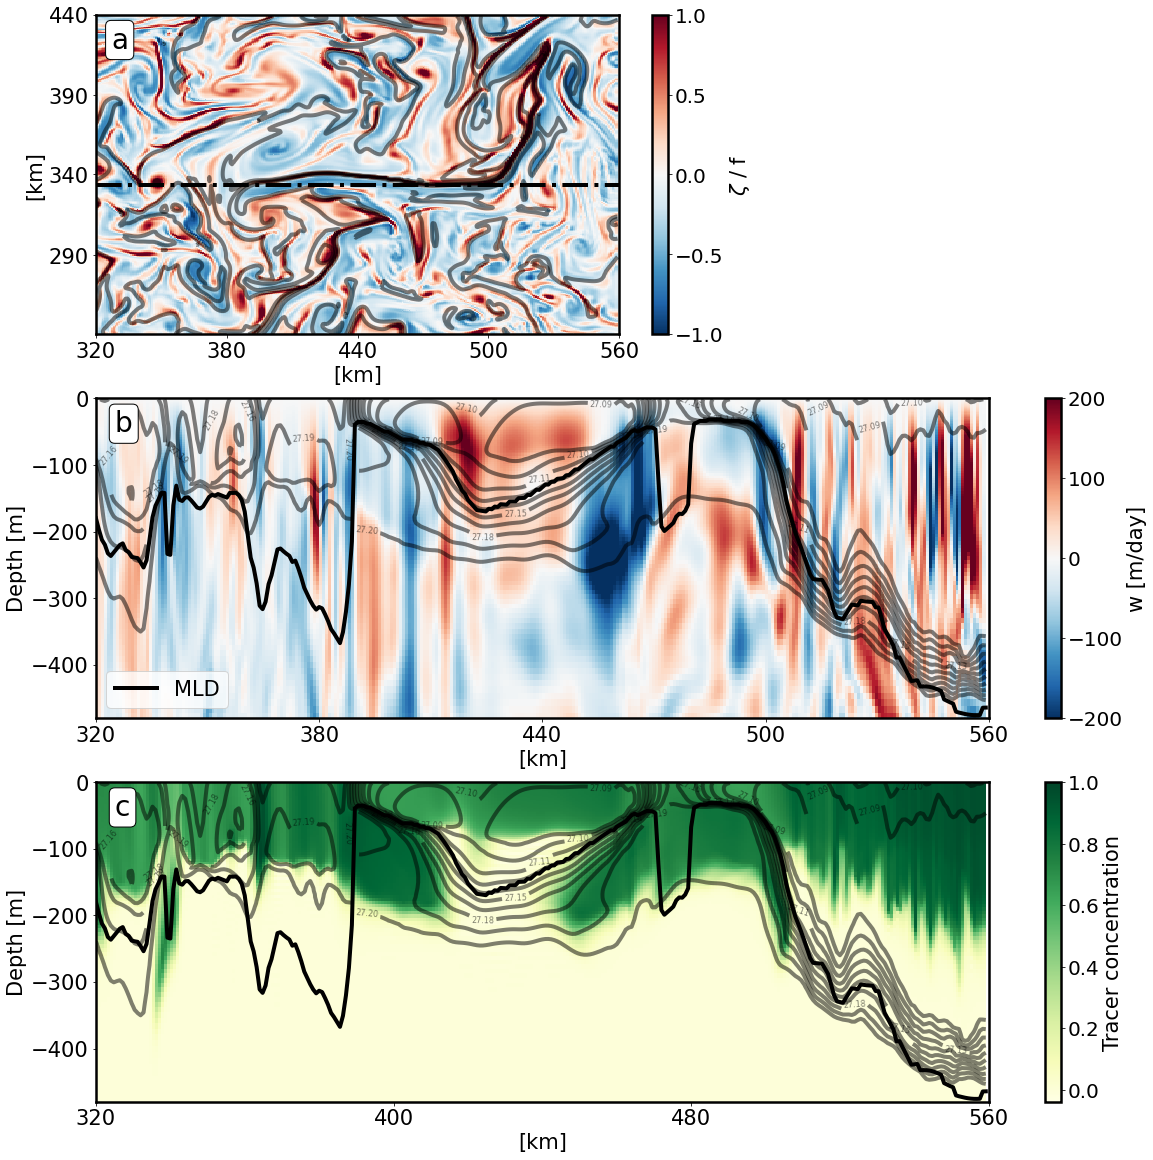

In [48]:
%matplotlib inline
from matplotlib import rc, rcParams
import matplotlib.gridspec as gridspec
import matplotlib.transforms as mtransforms

rc('axes', linewidth=2)
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
props = dict(boxstyle='round', facecolor='white', alpha=1)

size_tick = 21
size_label=21


delta = 202
y_f_i = 417#411
y_f = lat[0,y_f_i]


lon_min = 400
lon_max = 700
lon_size = lon[lon_min:lon_max,y_f_i]

lat_min = 300
lat_max = 550

#levels = [27.09,27.1,27.2,27.3]
levels = np.linspace(27.09,27.2,10)
levels_surf = np.linspace(27.09,27.2,4)

fig = plt.figure(figsize=(20,20))

#ax = plt.subplot(G[0.5:1.5, 0])

ax = plt.subplot2grid((3, 5), (0, 0),colspan=3)

label = 'a'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax.text(0.01, 0.98, label, transform=ax.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

#plt.title(r'$\zeta$ / f', fontsize=size_label)

cm = plt.pcolormesh(lon[lon_min:lon_max,lat_min:lat_max],lat[lon_min:lon_max,lat_min:lat_max],vrt[lon_min:lon_max,lat_min:lat_max],cmap = plt.cm.RdBu_r,vmax=1,vmin=-1)
#plt.contour(lon[:,200:600],lat[:,200:600],rho[:,200:600,-1],cmap = plt.cm.RdBu_r,alpha=1)
cb = plt.colorbar(cm,orientation='vertical')
cb.set_label(r'$\zeta$ / f', fontsize=size_label)
cb.ax.tick_params(labelsize=20)
CS = plt.contour(lon[lon_min:lon_max,lat_min:lat_max],lat[lon_min:lon_max,lat_min:lat_max],rho[lon_min:lon_max,lat_min:lat_max,-1],(1,0),levels=levels_surf,colors='k',alpha=0.5,label='Isodensity',linewidths=4)

front_left = lon[425,0]
front_right = lon[595,0]


plt.hlines(y_f,lon[lon_min,y_f],lon[lon_max,y_f],color='k',linestyle='-.',alpha=1,linewidth=4)
#plt.scatter(front_right,y_f,s=500, facecolors='none', edgecolors='k',linewidths =2)
#plt.scatter(front_left,y_f,s=500, facecolors='none', edgecolors='k',linewidths =2)
plt.xlim(lon[lon_min,y_f],lon[lon_max,y_f])
plt.ylim(lat_min,lat_max)
plt.ylabel('[km]',fontsize = size_label)
plt.xlabel('[km]',fontsize = size_label)
#plt.xlabel('Longitude [km]',fontsize = 14)
plt.xticks(fontsize=size_tick)
plt.yticks(fontsize=size_tick)
plt.xticks([])
plt.yticks([362,425,487,550],[290,340,390,440])
plt.xticks([400,475,550,625,700],[320,380,440,500,560],fontsize=size_tick)
#ax = fig.add_subplot(4,1,3)

ax = plt.subplot2grid((3, 3), (1, 0),colspan=3)

label = 'b'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax.text(0.01, 0.98, label, transform=ax.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))


pc = plt.pcolormesh(lon_size,z_r[501,y_f_i,:],np.transpose(w[lon_min:lon_max,y_f_i,:]*3600*24,(1,0)),vmax=200,vmin=-200,cmap = plt.cm.RdBu_r)
CS = plt.contour(lon_size,z_r[501,y_f_i,:],np.transpose(rho[lon_min:lon_max,y_f_i,:],(1,0)),levels=levels,colors='k',alpha=0.5,label='Isodensity',linewidths=4)
ax.clabel(CS, inline=True, fontsize=8,fmt='%2.2f')


plt.plot(lon_size,-mld_d[lon_min:lon_max,y_f_i],color='k',label='MLD',linewidth=4)
#plt.title('w [m/day]', fontsize=size_label)
plt.xticks([])
cb = plt.colorbar(pc,orientation='vertical')
cb.set_label('w [m/day]', fontsize=size_label)
cb.ax.tick_params(labelsize=20)
plt.ylim(-480,0)

plt.ylabel('Depth [m]',fontsize = size_label)
plt.legend(fontsize = size_label,loc=3)
plt.xticks(fontsize=size_tick)
plt.yticks(fontsize=size_tick)
plt.xticks([400,475,550,625,700],[320,380,440,500,560],fontsize=size_tick)
plt.xlabel('[km]',fontsize = size_label)
#ax = fig.add_subplot(4,1,4)


ax = plt.subplot2grid((3, 3), (2, 0), colspan=3)


label = 'c'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax.text(0.01, 0.98, label, transform=ax.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))


CS = plt.contour(lon_size,z_r[501,y_f,:],np.transpose(rho[lon_min:lon_max,y_f,:],(1,0)),levels=levels,colors='k',alpha=0.5,label='Isodensity',linewidths=4)
ax.clabel(CS, inline=True, fontsize=8,fmt='%2.2f')

plt.pcolormesh(lon_size,z_r[501,y_f_i,:],np.transpose(tpas[lon_min:lon_max,y_f_i,:],(1,0)),cmap = plt.cm.YlGn,vmax=1)
plt.plot(lon_size,-mld_d[lon_min:lon_max,y_f_i],color='k',label='mld',linewidth=4)
#plt.plot(lon[201:801,400],-mld_t[201:801,400],color='r',label='mld_t')
#plt.plot(lon[201:801,400],-mld_kpp[201:801,400],color='g',label='mld_kpp')
cb = plt.colorbar(orientation='vertical')
#plt.title('Tracer concentration', fontsize=size_label)
cb.set_label('Tracer concentration', fontsize=size_label)
cb.ax.tick_params(labelsize=20)
plt.xticks(fontsize=size_tick)
plt.ylim(-480,0)
plt.xlabel('[km]',fontsize = size_label)
plt.xticks([400,475,550,625,700],[320,380,440,500,560],fontsize=size_tick)

plt.xlabel('[km]',fontsize = size_label)
plt.xticks(fontsize=size_tick)
plt.yticks(fontsize=size_tick)
plt.xticks([400,500,600,700],[320,400,480,560])
#ax.yaxis.set_label_position("right")
plt.ylabel('Depth [m]',fontsize = size_label)
#plt.legend()

#plt.savefig(dir_save+'cut_front.pdf',dpi=nb_dpi,bbox_inches='tight')
plt.savefig(dir_save+'cut_front.png',dpi=nb_dpi,bbox_inches='tight')
